The dataset includes features related to thermal power plant operations. Here’s an explanation of the columns:

Steam and Boiler Operations

	1.	Main steam flow (t/h): Steam mass flow rate from the boiler (in tons/hour).
	2.	Main steam temperature (boiler side) (℃): Steam temperature exiting the boiler.
	3.	Main steam pressure (boiler side) (Mpa): Pressure of steam leaving the boiler.
	4.	Reheat steam temperature (boiler side) (℃): Temperature of reheat steam after the first expansion in the turbine.
	5.	Superheater desuperheating water flow (t/h): Flow rate of water used to control superheater steam temperature.
	6.	Reheater desuperheating water flow (t/h): Flow rate of water used to control reheater steam temperature.
	7.	Flue gas temperature (℃): Temperature of exhaust gases leaving the boiler.
	8.	Boiler oxygen level (%): Oxygen content in boiler flue gas, indicative of combustion efficiency.

Turbine and Condenser

	9.	Main steam temperature (turbine side) (℃): Steam temperature at the turbine inlet.
	10.	Main steam pressure (turbine side) (MPa): Steam pressure at the turbine inlet.
	11.	Reheat steam temperature (turbine side) (℃): Reheated steam temperature entering the turbine.
	12.	Reheat steam pressure (turbine side) (MPa): Reheated steam pressure at the turbine.
	13.	Control stage pressure (Mpa): Pressure at the turbine’s control stage.
	14.	High exhaust pressure (Mpa): Pressure at the high-pressure turbine exhaust.
	15.	Condenser vacuum (kPa): Vacuum pressure in the condenser, critical for efficiency.

Feedwater and Circulating Water Systems

	16.	Feedwater temperature (℃): Temperature of water entering the boiler.
	17.	Feedwater flow (t/h): Flow rate of feedwater supplied to the boiler.
	18.	Feedwater pressure (MPa): Pressure of feedwater entering the boiler.
	19.	Circulating water outlet temperature (℃): Temperature of water leaving the condenser.
	

Environmental Emissions

	20.	SO2 (mg/m3): Sulfur dioxide concentration in the flue gas.
	21.	Nox (mg/m3): Nitrogen oxides concentration in the flue gas.
	22.	CO (mg/m3): Carbon monoxide concentration in the flue gas.
	23.	CO2 (ppm): Carbon dioxide concentration in the flue gas.
	24.	O2 (%): Oxygen level in the exhaust gases.
	

Fuel and Combustion Parameters

	25.	Coal Flow (t/h): Coal consumption rate.
	26.	Energy Input From Boiler (Kcal/h): Energy provided by the fuel to the boiler.
	27.	HHV (Kcal/Kg): Higher heating value of the coal, indicating energy content.
	

Efficiency and Performance Metrics

	28.	Boiler Eff (%): Boiler efficiency as a percentage.
	29.	NTHR (Kcal/Kwh): Net thermal heat rate (energy consumed per unit of electricity generated).
	30.	NPHR (Kcal/Kwh): Net plant heat rate.
	31.	Gross Load (MW): Total power output of the plant.
	32.	Nett Load (MW): Net power output after accounting for internal consumption.
	33.	APH Effectiveness (%): Air preheater efficiency.

Thermodynamic Properties

	34.	Entalphy inlet MS (kj/kg): Enthalpy of main steam entering the turbine.
	35.	Entropi Inlet MS (Kj/Kg (Deg C)): Entropy of main steam at the turbine inlet.
	36.	Cold Reheat Pressure (Mpa): Pressure of cold reheat steam returning to the boiler.
	37.	Cold Reheat Temperature (°C): Temperature of the cold reheat steam.
	38.	ΔP aktual (Kj/Kg): Actual pressure drop across the system.
	39.	ΔHP isentropis (Kj/Kg): Isentropic enthalpy drop in the turbine.
	40.	HP Turbine eff (%): Efficiency of the high-pressure turbine.

Air and Flue Gas

	41.	O2 in APH (%): Oxygen level entering the air preheater.
	42.	O2 Out APH (%): Oxygen level exiting the air preheater.
	43.	Refference Temperature (°C): Reference temperature for efficiency calculations.
	44.	Flue Gas in Temperature (°C): Temperature of flue gas entering the air preheater.
	45.	Corrected Flue Gas Out Temperature (°C): Corrected temperature of flue gas exiting the air preheater.
	46.	APH Leakage (%): Air preheater leakage percentage.

Additional Parameters

	47.	Velocity (m/s): Flow velocity in certain ducts or pipelines.
	48.	Temp. (°C): General temperature readings.
	49.	Pressure (Kpa): General pressure readings.
	50.	Flow rate (KNm3/h): Flow rate of gases or liquids.
	51.	Opacity (%): Opacity of exhaust gases, indicating particulate emissions.
	52.	Dust (mg/m3): Concentration of dust in flue gases.

Purpose

These features are essential for:

	1.	Monitoring and Diagnostics: Identifying inefficiencies or malfunctions.
	2.	Optimization: Improving thermal efficiency.
	3.	Predictive Maintenance: Detecting faults before failures occur.
	4.	Environmental Compliance: Monitoring emissions.

Below is a step-by-step guide to the machine learning case study for predicting NPHR (Kcal/Kwh) using a Linear Regression model:


Step 1: Import Required Libraries

	•	Purpose: Import Python libraries required for data handling, visualization, machine learning, and model evaluation.
	•	pandas and numpy for data manipulation.
	•	seaborn and matplotlib for visualizations.
	•	scikit-learn for machine learning algorithms and metrics.
	•	joblib for saving the trained model.

In [16]:
print("Welcome to Python Notebook")

Welcome to Python Notebook


In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

Step 2: Load the Dataset

	•	Purpose: Load the data into a pandas DataFrame for processing and analysis.
	•	Actions:
	•	Use pd.read_excel() to read the Excel file.
	•	Use .head() and .info() to inspect the structure, data types, and missing values.

In [18]:
# Load the dataset
file_path = './dataset_combined_final.xlsm'
data = pd.read_excel(file_path)

# Inspect the dataset
print(data.head())
print(data.info())

   Unnamed: 0    Tanggal  Main steam flow (t/h)  \
0           1 2024-01-01             829.895767   
1           2 2024-01-02             836.935916   
2           3 2024-01-03             828.634270   
3           4 2024-01-04             830.700920   
4           5 2024-01-05             840.836756   

   Main steam temperature (boiler side) (℃)  \
0                                566.840549   
1                                566.881735   
2                                567.291646   
3                                566.777897   
4                                566.164801   

   Main steam pressure (boiler side) (Mpa)  \
0                                14.459605   
1                                14.382862   
2                                14.598511   
3                                14.672297   
4                                14.718665   

   Reheat steam temperature (boiler side) (℃)  \
0                                  565.474815   
1                                  

Step 3: Preprocess the Data

	•	Purpose: Clean and prepare the data for analysis.
	
	•	Drop unnecessary columns like Unnamed: 0, which doesn’t add value.
	•	Handle missing values by filling them with the mean to avoid errors.
	•	Extract features from the date column (Tanggal) to capture temporal trends (e.g., Year, Month, Day).
	•	Remove the original date column since the extracted features replace it.

In [19]:
# Drop unnecessary columns
data.drop(columns=['Unnamed: 0'], inplace=True)

# Handle missing values by filling with the mean
data.fillna(data.mean(), inplace=True)

# Extract useful features from 'Tanggal' (date column)
data['Year'] = data['Tanggal'].dt.year
data['Month'] = data['Tanggal'].dt.month
data['Day'] = data['Tanggal'].dt.day

# Drop the original datetime column
data.drop(columns=['Tanggal'], inplace=True)

In [20]:
data.columns

Index(['Main steam flow (t/h)', 'Main steam temperature (boiler side) (℃)',
       'Main steam pressure (boiler side) (Mpa)',
       'Reheat steam temperature (boiler side) (℃)',
       'Superheater desuperheating water flow (t/h)',
       'Reheater desuperheating water flow (t/h)', 'Feedwater temperature (℃)',
       'Feedwater flow (t/h)', 'Flue gas temperature (℃)',
       'Boiler oxygen level (%)', 'Main steam temperature (turbine side) (℃)',
       'Main steam pressure (turbine side) (MPa)',
       'Reheat steam temperature (turbine side) (℃)',
       'Reheat steam pressure (turbine side) (MPa)',
       'Control stage pressure (Mpa)', 'High exhaust pressure (Mpa)',
       'Feedwater pressure (MPa)', 'Condenser vacuum (kPa)',
       'Circulating water outlet temperature (℃)', 'SO2 (mg/m3)',
       'Nox (mg/m3)', 'CO (mg/m3)', 'CO2 (ppm)', 'O2 (%)', 'Velocity (m/s)',
       'Temp. (°C)', 'Pressure (Kpa)', 'Flow rate (KNm3/h)', 'Opacity (%)',
       'Dust (mg/m3)', 'Boiler Eff (%)', 

Step 4: Feature Selection

	•	Purpose: Identify the most relevant features correlated with the target variable (NPHR).
	•	Actions:
	•	Use data.corr() to calculate correlation coefficients.
	•	Sort the correlations with the target variable in descending order.
	•	Select the top features for training the model.

In [21]:
# Calculate correlations with the target variable
target = 'NPHR (Kcal/Kwh)'
correlation = data.corr()[target].sort_values(ascending=False)

# Display top correlated features
top_features = correlation.head(15).index.tolist()
print("Top Features Correlated with NPHR:")
print(correlation.head(15))

Top Features Correlated with NPHR:
NPHR (Kcal/Kwh)                                1.000000
NTHR (Kcal/Kwh)                                0.998191
Energy Input From Boiler (Kcal/h)              0.878786
Coal Flow (t/h)                                0.875741
Superheater desuperheating water flow (t/h)    0.610384
Condenser vacuum (kPa)                         0.603272
Reheat steam pressure (turbine side) (MPa)     0.532259
High exhaust pressure (Mpa)                    0.525490
Main steam flow (t/h)                          0.525321
Cold Reheat Pressure (Mpa)                     0.512148
APH Leakage (%)                                0.486613
Nox (mg/m3)                                    0.483610
Velocity (m/s)                                 0.451944
Flow rate (KNm3/h)                             0.451944
Reheater desuperheating water flow (t/h)       0.428223
Name: NPHR (Kcal/Kwh), dtype: float64


Heatmap for the correlation of the top_features

    1.	sns.heatmap():

	•	data[top_features].corr() computes the correlation matrix for the selected top features.

	•	annot=True displays the correlation values inside the heatmap.

	•	cmap="coolwarm" sets the color scheme for better visualization.

	•	fmt=".2f" ensures numerical values are displayed with two decimal places.

	2.	plt.figure():
	
	•	Adjusts the figure size to make the heatmap more legible.

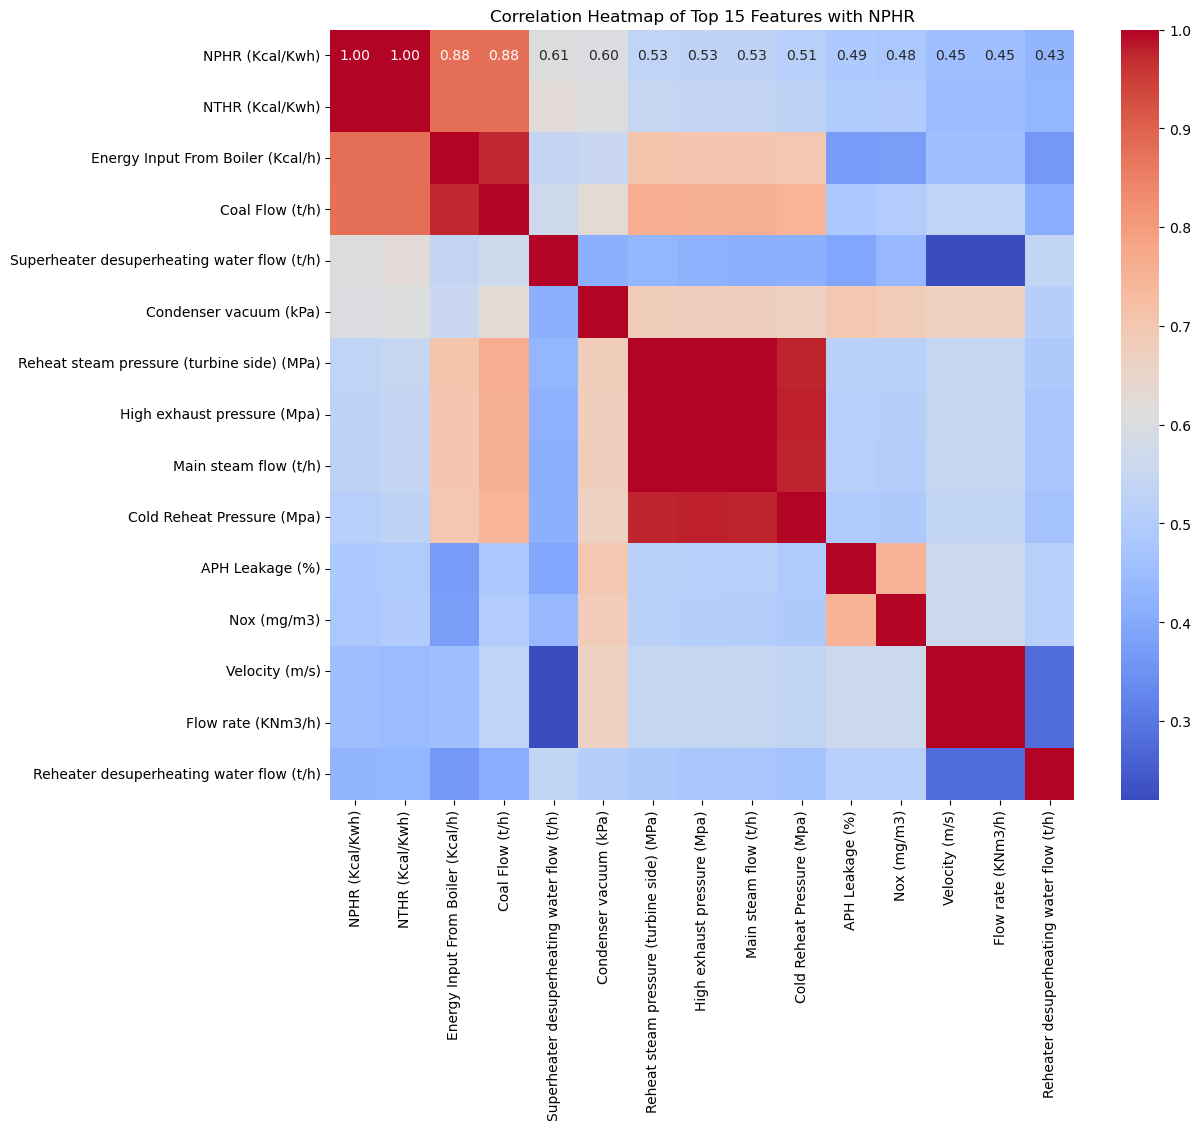

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure that `top_features` contains the most correlated feature names with the target
# and `data` is the DataFrame.

# Generate the heatmap
plt.figure(figsize=(12, 10))  # Adjust the figure size for better readability
sns.heatmap(data[top_features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Top 15 Features with NPHR")
plt.show()

Step 5: Prepare the Data

	•	Purpose: Split the dataset into features (X) and the target variable (y) for training and testing.
	•	Actions:
	•	X: All top correlated features except the target.
	•	y: The target variable, NPHR.
	•	Use train_test_split() to divide the data into training (80%) and testing (20%) sets for model evaluation.

In [23]:
# Define features (X) and target (y)
X = data[top_features].drop(columns=[target])  # Features
y = data[target]  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
#help(train_test_split)

In machine learning, random_state=42 is a parameter often used to control randomness in algorithms that involve random number generation, such as:
    •	Splitting datasets into training and testing sets.
    •	Initializing weights in algorithms.
    •	Shuffling data before training.

By fixing the random_state parameter, you ensure that the results of the operation are reproducible—the same sequence of random numbers will be generated every time the code is executed.

Step 6: Train the Linear Regression Model

	•	Purpose: Fit a Linear Regression model to the training data.
	•	Actions:
	•	Initialize a LinearRegression object.
	•	Fit the model using model.fit(X_train, y_train).

In [31]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

print("Input Features for Testing",X_test[:4])

# Make predictions on the test data
y_pred = model.predict(X_test)

print("Predicated y_test ( NPHR)",y_pred[:10] )

Input Features for Testing     NTHR (Kcal/Kwh)  Energy Input From Boiler (Kcal/h)  Coal Flow (t/h)  \
40      2548.378901                       7.067419e+08          166.516   
22      2568.088939                       7.225575e+08          170.656   
55      2521.312660                       7.023873e+08          165.490   
72      2472.010675                       6.891719e+08          161.323   

    Superheater desuperheating water flow (t/h)  Condenser vacuum (kPa)  \
40                                    82.984456              -93.222817   
22                                    88.256428              -92.345415   
55                                    79.904855              -93.148938   
72                                    58.194586              -93.484422   

    Reheat steam pressure (turbine side) (MPa)  High exhaust pressure (Mpa)  \
40                                    1.947519                     2.173320   
22                                    1.988890                 

tep 7: Evaluate the Model

	•	Purpose: Assess the model’s performance on the test data.

	•	Metrics:

	1.	Mean Squared Error (MSE): Average squared error between predicted and actual values.
	2.	Root Mean Squared Error (RMSE): Square root of MSE for interpretable error in target units.
	3.	R² Score: Proportion of variance in the target explained by the model.

	Actions:
	•	Predict test values using model.predict(X_test).
	•	Use metrics like mean_squared_error and r2_score.

In [26]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error (MSE): 2.9061
Root Mean Squared Error (RMSE): 1.7047
R² Score: 0.9984


In [32]:
# Assuming y_test and y_pred are defined
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

# Calculate accuracy as a percentage
accuracy = r2 * 100

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Accuracy: {accuracy:.2f}%")

Mean Squared Error (MSE): 2.9061
Root Mean Squared Error (RMSE): 1.7047
R² Score: 0.9984
Accuracy: 99.84%


    Accuracy (%): Reflects the percentage of variance in the target variable explained by the model.
    Perfect fit (100% accuracy).
    The model performs no better than simply predicting the mean.
    The model is worse than predicting the mean.


Step 8: Analyze Feature Importance

	•	Purpose: Understand which features contributed most to predictions.
	•	Actions:
	•	Extract feature coefficients from the model.
	•	Plot feature importance using a bar plot to visualize their influence on the target.

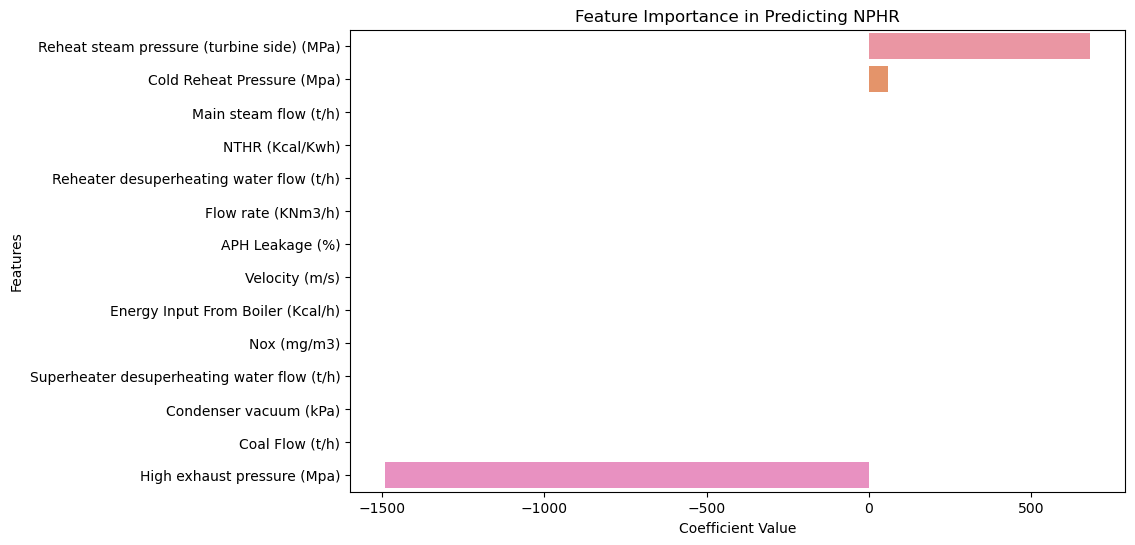

In [27]:
# Coefficients from the Linear Regression model
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title("Feature Importance in Predicting NPHR")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.show()

How Coefficients Work in Linear Regression

In Linear Regression, coefficients represent the impact of each feature on the target variable. The model aims to find the best-fit line (or hyperplane in higher dimensions) that minimizes the error between the predicted and actual values.

Linear Regression Formula:

Where:
    •	Target variable (e.g., NPHR in this case).
    •	Intercept (the predicted value when all features are zero).
    •	Coefficient of the feature.
    •	Value of the feature.

Interpretation of Coefficients
    1.	Magnitude:
    •	A larger coefficient (absolute value) indicates a stronger impact on the target variable.
    2.	Sign:
    •	Positive Coefficient: As the feature increases, the target variable also increases.
    •	Negative Coefficient: As the feature increases, the target variable decreases.
    3.	Zero or Near Zero:
    •	The feature has little to no impact on the target variable.


Step 9: Residual Analysis

	•	Purpose: Check the model’s prediction accuracy by analyzing residuals (actual - predicted values).
    
Actions:
	•	Histogram: Ensure residuals are centered around 0 for no bias.
	
	•	Scatter Plot: Residuals vs. Predicted values to check for systematic patterns (ideal: no clear pattern).


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


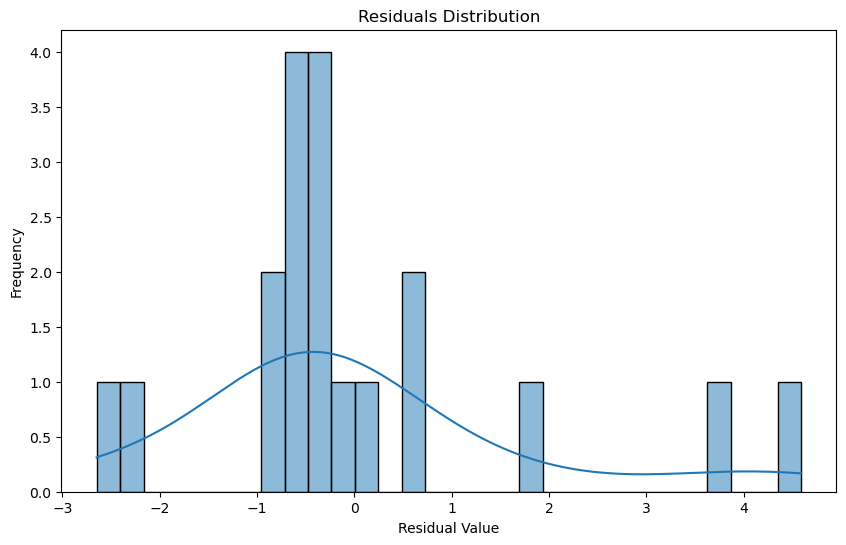

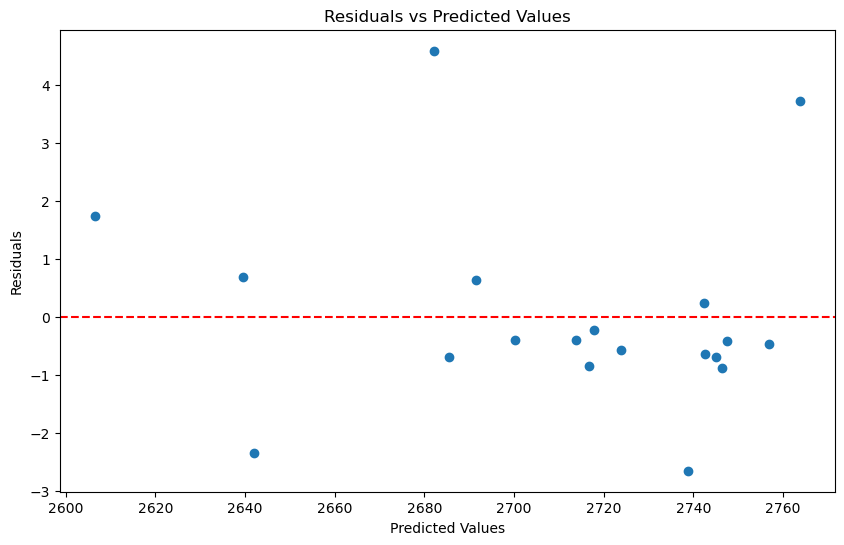

In [28]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Residuals Distribution")
plt.xlabel("Residual Value")
plt.ylabel("Frequency")
plt.show()

# Scatter plot of residuals vs predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

Step 10: Save the Model and Generate Report

	•	Purpose: Save the trained model and create a report summarizing the results.

Actions:
	•	Save the model using joblib.dump() for future use.
	•	Generate a summary report including:
	•	Key metrics (MSE, RMSE, R²).
	•	Top contributing features.
	•	Notes about the model’s performance and residuals.
	•	Save the report as a text file for reference.

In [29]:
# Save the trained model
model_file_path = "./linear_regression_nphr_model.pkl"
joblib.dump(model, model_file_path)

# Generate a report
report = f"""
### Model Summary Report
1. **Target Variable**: NPHR (Kcal/Kwh)
2. **Algorithm**: Linear Regression

### Performance Metrics:
- **Mean Squared Error (MSE)**: {mse:.4f}
- **Root Mean Squared Error (RMSE)**: {rmse:.4f}
- **R² Score**: {r2:.4f}

### Top Features Contributing to NPHR Prediction:
{coefficients.head(5).to_string(index=False)}

### Notes:
- Residual analysis indicates minimal bias.
- The model is saved for deployment.

**Saved Model Path**: {model_file_path}
"""

# Save the report
report_file_path = "./model_summary_report.txt"
with open(report_file_path, "w") as f:
    f.write(report)

print(f"Model saved at: {model_file_path}")
print(f"Report saved at: {report_file_path}")

Model saved at: ./linear_regression_nphr_model.pkl
Report saved at: ./model_summary_report.txt


This step-by-step workflow ensures a thorough and systematic approach to building and evaluating the machine learning model

Logistic Regression (For Binary/Multiclass Classification)


	Steps:
		1.	Choose a classification target (e.g., converting NPHR into a binary/multiclass target if needed).
		2.	Preprocess the data (handle missing values, scale features).
		3.	Train and evaluate the Logistic Regression model.